# The Haberman's Survival Dataset contains information about patients who had undergone breast cancer surgery, such as their age, year of surgery, and number of positive lymph nodes.

# The task is to predict whether a patient will survive for more than 5 years or not.

***Q1. Display the last five rows, info, summary, shape and classes of the haberman dataset***

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#Read the data
df=pd.read_csv('haberman.csv')
#Display last five rows of the train data with column names
df.tail()

,age,year,node,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [ ]:
#information of train data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   node    306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
#Summary of data
df.describe()

,age,year,node,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


***count shows the number of responses.
unique shows the number of unique categorical values.
top shows the highest-occurring categorical value.
freq shows the frequency/count of the highest-occurring categorical value.***

In [ ]:
df.shape

(306, 4)

In [ ]:
df.nunique()

age       49
year      12
node      31
status     2
dtype: int64

***Q2. Find the number of counts in each class and plot it***

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style='white', color_codes=True)
print(df['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


<AxesSubplot:xlabel='status', ylabel='count'>

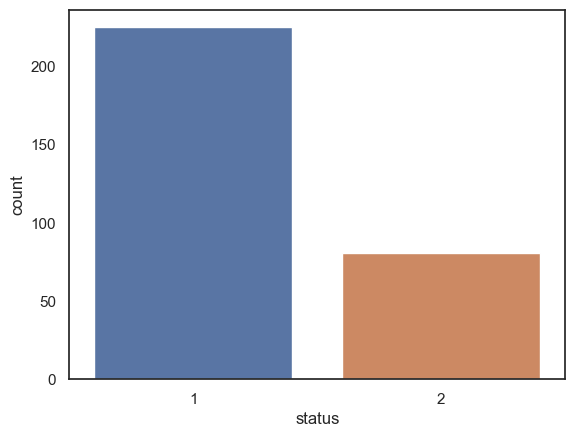

In [ ]:
sns.countplot(x='status', data=df)

***Q3. Find the correlation map of train data***

<AxesSubplot:>

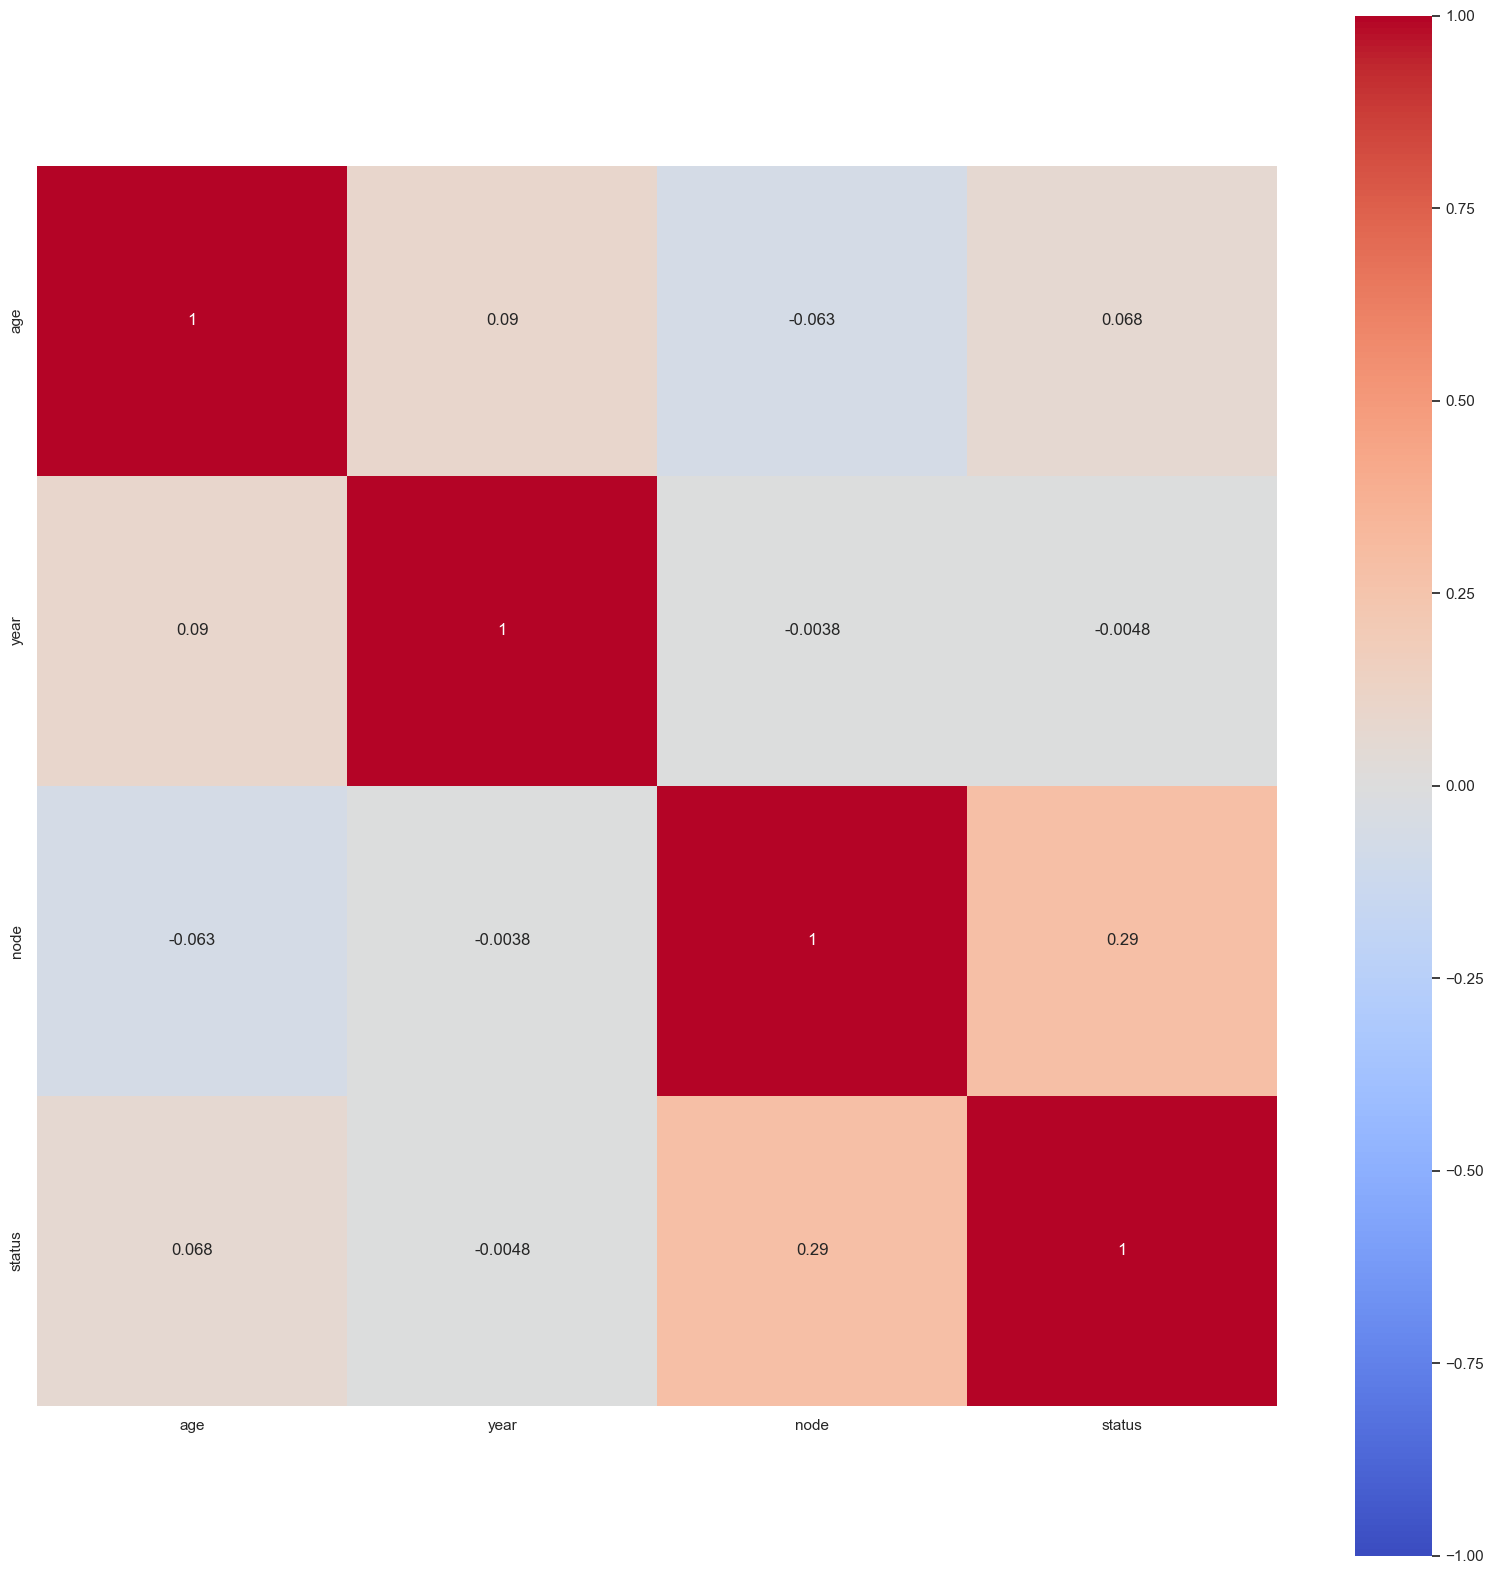

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

***Q3. Spilt the data training data into training and testing and assigned the target value with test size as 0.2 and random state as 34***

In [ ]:
#split Train and Test
from sklearn import metrics
from sklearn.model_selection import train_test_split
X = df.drop('status',axis=1)
y = df['status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34, test_size=0.3)

***Q4. Find the classification accuarcy using kNN***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
#Measure the accuracy
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
print("Accuracy score %.3f" % metrics.accuracy_score(y_test, y_pred_knn))

Accuracy score 0.783


***Q.5. Find the classification accuracy using Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Accuracy score %.3f" % metrics.accuracy_score(y_test, y_pred_logreg))

Accuracy score 0.815


***Q6. Find the classification score using Naive bayes***

In [ ]:
# Importing the model:
from sklearn.naive_bayes import GaussianNB

# Initiating the model:
nb = GaussianNB()
nb.fit(X_train, y_train)
# Predicting the Test set results
y_pred = nb.predict(X_test)
print("Accuracy score %.3f" % metrics.accuracy_score(y_test, y_pred))

Accuracy score 0.793


***Q7. Find the classification score using Decision Tree using information gain***

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
#setting citeria for information gain both log loss and entropy are used
clf = DecisionTreeClassifier(criterion = 'entropy').fit(X_train,y_train)
# Predicting the Test set results
y_pred = clf.predict(X_test)
print("Accuracy score %.3f" % metrics.accuracy_score(y_test, y_pred))

Accuracy score 0.696
